In [13]:
!source activate py36

In [14]:
import sys

sys.path.append('/home/faske/g/anaconda3/envs/py36/lib/python3.6/site-packages')
sys.path.append("/home/faske/g/ipynb/include_utils")

import ipyparallel as ipp
import os, time
import include_utils as u
import pandas as pd
import numpy as np
import scipy as sp
import numbers
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
#import vcf
from sklearn import preprocessing
from subprocess import Popen, PIPE, call, check_output
import seaborn as sns
from IPython.display import FileLink
import urllib.request as urllib2
import dill
import traceback
from pandas import Series, DataFrame
import gzip
import warnings
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)
%config InlineBackend.figure_format = 'retina'
from Bio import SeqIO
#import pysam
from collections import OrderedDict, namedtuple, Counter
import operator
import multiprocessing as mp
import shutil
import tempfile
#from ipyparallel import Client
import scandir
import glob
from Bio.SeqIO.QualityIO import FastqGeneralIterator
import pickle
#import Levenshtein as lv

In [15]:
snp_dir = "/home/faske/g/balsam/SNPcall"

In [16]:
bowtie_dir = "/home/faske/g/balsam/SNPcall/bowtie2"

In [17]:
cd $bowtie_dir

/working/tfaske/balsam/SNPcall/bowtie2


In [18]:
bam_files = []
files = !find . -type f -name '*sorted.bam'
files = [os.path.abspath(x) for x in files if 'bam' in x]
for x in files:
    bam_files.append(x)
bam_files = sorted(bam_files)

In [19]:
len(bam_files), bam_files[0]

(373, '/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_1.F.fq.gz_sorted.bam')

In [20]:
samtools = "samtools"
bcftools = "bcftools"
java = "java"
perl = "perl"
#perl = "/home/cfriedline/gpfs/opt/ActivePerl-5.18/bin/perl"

In [21]:
assembly = "/home/faske/g/balsam/assembly/reference.fasta"

#indexed as: bowtie2-build --threads 10 -f reference.fasta reference.fasta

In [22]:
!$samtools faidx {assembly}

# Calculates coverage from bam_files
also outputs a file called "bam_coverage.csv" in the bam folder

# Did not run fully as it is hard to assess with a full genome
    skip to snp call 

In [23]:
cd $bowtie_dir

/working/tfaske/balsam/SNPcall/bowtie2


In [24]:
bam_files = []
files = !find . -type f -name '*sorted.bam'
files = [os.path.abspath(x) for x in files if 'bam' in x]
for x in files:
    bam_files.append(x)
bam_files = sorted(bam_files)

In [25]:
len(bam_files), bam_files[0]

(373, '/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_1.F.fq.gz_sorted.bam')

In [27]:
bam_names = []
cov_list = []
for i in range(0,len(bam_files)):
    bam = bam_files[i]
    print(bam)
    b = bam.split('/')[6]
    #print (b)
    !$samtools depth -a $b > $'cov.txt'
    cov = pd.read_csv('cov.txt', sep="\t",header=None)
    coverage = sum(cov.iloc[:,2])/len(cov.index)
    name = b.split('.F')[0]
    #print(name)
    bam_names.append(name)
    cov_list.append(coverage)
    print(coverage,name)
cov_df = pd.DataFrame(bam=bam_names,coverage=cov_list)
cov_df.head()

/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_1.F.fq.gz_sorted.bam
27.557045123641153 BS_AN_1
/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_10.F.fq.gz_sorted.bam
25.85151947340451 BS_AN_10
/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_11.F.fq.gz_sorted.bam
24.67785277250382 BS_AN_11
/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_12.F.fq.gz_sorted.bam
23.896954317424065 BS_AN_12
/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_2.F.fq.gz_sorted.bam
34.56684358505273 BS_AN_2
/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_3.F.fq.gz_sorted.bam
25.90125243170679 BS_AN_3
/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_4.F.fq.gz_sorted.bam
27.45409478760834 BS_AN_4
/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_5.F.fq.gz_sorted.bam
22.84919828385814 BS_AN_5
/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_6.F.fq.gz_sorted.bam
24.199088709689757 BS_AN_6
/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_7.F.fq.gz_sorted.bam
29.144103356120837 BS_AN_7
/working/tfaske/balsam/SNPcall/bowtie2/BS_AN_8.F.fq.gz_sorted.bam
33.1

20.793969025575382 BS_CN_5
/working/tfaske/balsam/SNPcall/bowtie2/BS_CN_6.F.fq.gz_sorted.bam
16.819202201385465 BS_CN_6
/working/tfaske/balsam/SNPcall/bowtie2/BS_CN_7.F.fq.gz_sorted.bam
25.29582527889052 BS_CN_7
/working/tfaske/balsam/SNPcall/bowtie2/BS_CN_8.F.fq.gz_sorted.bam
17.517940361740266 BS_CN_8
/working/tfaske/balsam/SNPcall/bowtie2/BS_CN_9.F.fq.gz_sorted.bam
28.399894857943327 BS_CN_9
/working/tfaske/balsam/SNPcall/bowtie2/BS_EC_1.F.fq.gz_sorted.bam
26.101682165738993 BS_EC_1
/working/tfaske/balsam/SNPcall/bowtie2/BS_EC_10.F.fq.gz_sorted.bam
27.04103889288956 BS_EC_10
/working/tfaske/balsam/SNPcall/bowtie2/BS_EC_11.F.fq.gz_sorted.bam
31.513937503038967 BS_EC_11
/working/tfaske/balsam/SNPcall/bowtie2/BS_EC_12.F.fq.gz_sorted.bam
27.024398913210682 BS_EC_12
/working/tfaske/balsam/SNPcall/bowtie2/BS_EC_2.F.fq.gz_sorted.bam
23.532957585021016 BS_EC_2
/working/tfaske/balsam/SNPcall/bowtie2/BS_EC_3.F.fq.gz_sorted.bam
20.78660343805572 BS_EC_3
/working/tfaske/balsam/SNPcall/bowtie2/B

18.302081651098703 BS_KB_9
/working/tfaske/balsam/SNPcall/bowtie2/BS_KM_1.F.fq.gz_sorted.bam
4.542397639590297 BS_KM_1
/working/tfaske/balsam/SNPcall/bowtie2/BS_KM_10.F.fq.gz_sorted.bam
21.201363234467134 BS_KM_10
/working/tfaske/balsam/SNPcall/bowtie2/BS_KM_11.F.fq.gz_sorted.bam
21.374738900103672 BS_KM_11
/working/tfaske/balsam/SNPcall/bowtie2/BS_KM_12.F.fq.gz_sorted.bam
11.350220729055085 BS_KM_12
/working/tfaske/balsam/SNPcall/bowtie2/BS_KM_2.F.fq.gz_sorted.bam
18.43517612048677 BS_KM_2
/working/tfaske/balsam/SNPcall/bowtie2/BS_KM_3.F.fq.gz_sorted.bam
2.253653418390901 BS_KM_3
/working/tfaske/balsam/SNPcall/bowtie2/BS_KM_4.F.fq.gz_sorted.bam
23.894868859183923 BS_KM_4
/working/tfaske/balsam/SNPcall/bowtie2/BS_KM_6.F.fq.gz_sorted.bam
24.516874202569287 BS_KM_6
/working/tfaske/balsam/SNPcall/bowtie2/BS_KM_7.F.fq.gz_sorted.bam
27.775564142458336 BS_KM_7
/working/tfaske/balsam/SNPcall/bowtie2/BS_KM_8.F.fq.gz_sorted.bam
27.944316981094453 BS_KM_8
/working/tfaske/balsam/SNPcall/bowtie2/B

28.594684255826827 BS_RC_4
/working/tfaske/balsam/SNPcall/bowtie2/BS_RC_5.F.fq.gz_sorted.bam
25.50057910357185 BS_RC_5
/working/tfaske/balsam/SNPcall/bowtie2/BS_RC_6.F.fq.gz_sorted.bam
25.064438098214286 BS_RC_6
/working/tfaske/balsam/SNPcall/bowtie2/BS_RC_7.F.fq.gz_sorted.bam
24.15052045704253 BS_RC_7
/working/tfaske/balsam/SNPcall/bowtie2/BS_RC_8.F.fq.gz_sorted.bam
25.57301204566634 BS_RC_8
/working/tfaske/balsam/SNPcall/bowtie2/BS_RC_9.F.fq.gz_sorted.bam
23.040109845635047 BS_RC_9
/working/tfaske/balsam/SNPcall/bowtie2/BS_RL_1.F.fq.gz_sorted.bam
27.48623646880739 BS_RL_1
/working/tfaske/balsam/SNPcall/bowtie2/BS_RL_10.F.fq.gz_sorted.bam
23.531414077478196 BS_RL_10
/working/tfaske/balsam/SNPcall/bowtie2/BS_RL_11.F.fq.gz_sorted.bam
30.980534355079442 BS_RL_11
/working/tfaske/balsam/SNPcall/bowtie2/BS_RL_12.F.fq.gz_sorted.bam
22.566487788615614 BS_RL_12
/working/tfaske/balsam/SNPcall/bowtie2/BS_RL_2.F.fq.gz_sorted.bam
23.50098060992482 BS_RL_2
/working/tfaske/balsam/SNPcall/bowtie2/BS_

25.02185332324065 BS_TM_2
/working/tfaske/balsam/SNPcall/bowtie2/BS_TM_3.F.fq.gz_sorted.bam
10.372048453350335 BS_TM_3
/working/tfaske/balsam/SNPcall/bowtie2/BS_TM_4.F.fq.gz_sorted.bam
34.12248468977048 BS_TM_4
/working/tfaske/balsam/SNPcall/bowtie2/BS_TM_5.F.fq.gz_sorted.bam
32.62815601611368 BS_TM_5
/working/tfaske/balsam/SNPcall/bowtie2/BS_TM_6.F.fq.gz_sorted.bam
28.46555642470251 BS_TM_6
/working/tfaske/balsam/SNPcall/bowtie2/BS_TM_7.F.fq.gz_sorted.bam
21.40541003582298 BS_TM_7
/working/tfaske/balsam/SNPcall/bowtie2/BS_TM_8.F.fq.gz_sorted.bam
25.47322971156349 BS_TM_8
/working/tfaske/balsam/SNPcall/bowtie2/BS_TM_9.F.fq.gz_sorted.bam
26.805963769416874 BS_TM_9
/working/tfaske/balsam/SNPcall/bowtie2/BS_WC_1.F.fq.gz_sorted.bam
23.15669285371814 BS_WC_1
/working/tfaske/balsam/SNPcall/bowtie2/BS_WC_10.F.fq.gz_sorted.bam
24.740025829461263 BS_WC_10
/working/tfaske/balsam/SNPcall/bowtie2/BS_WC_11.F.fq.gz_sorted.bam
25.061676343641945 BS_WC_11
/working/tfaske/balsam/SNPcall/bowtie2/BS_WC_1

TypeError: __init__() got an unexpected keyword argument 'bam'

In [28]:
cov_dict = {"bam":bam_names,'coverage':cov_list}
cov_df = pd.DataFrame(cov_dict)
cov_df.head()
#len(cov_df)

,bam,coverage
0,BS_AN_1,27.557045
1,BS_AN_10,25.851519
2,BS_AN_11,24.677853
3,BS_AN_12,23.896954
4,BS_AN_2,34.566844


In [29]:
cov_out = os.path.join(bowtie_dir,'bam_coverage.csv')
cov_df.to_csv(path_or_buf=cov_out)

In [30]:
cov_df.coverage.describe()


count    373.000000
mean      24.172100
std        4.967044
min        1.491386
25%       21.414869
50%       24.457073
75%       27.041039
max       40.079275
Name: coverage, dtype: float64

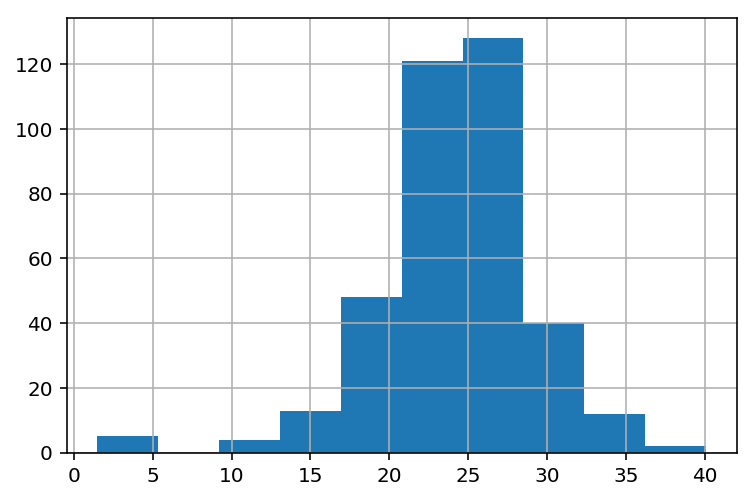

In [39]:
cov_df.coverage.hist()

In [31]:
len(cov_df.coverage)

373

# move good bams

In [40]:
len(cov_df[cov_df.coverage > 5]),len(cov_df[cov_df.coverage > 15])

(368, 360)

In [41]:
good_bam = cov_df.bam[cov_df.coverage >= 15]
good_bam = good_bam.tolist()
len(good_bam),good_bam[0]

(360, 'BS_AN_1')

In [42]:
good_bam_files = []
for i in range(0,len(good_bam)):
    bam = bowtie_dir + '/' + good_bam[i] + '.F.fq.gz_sorted.bam'
    good_bam_files.append(bam)
len(good_bam_files), good_bam_files[1]

(360, '/home/faske/g/balsam/SNPcall/bowtie2/BS_AN_10.F.fq.gz_sorted.bam')

In [43]:
cd $snp_dir

/working/tfaske/balsam/SNPcall


In [44]:
!mkdir 'good_bams'

In [45]:
good_bam_dir = os.path.join(snp_dir,'good_bams')

In [46]:
for i in range(0,len(good_bam_files)):
    good_bam = str(good_bam_files[i])
    !cp $good_bam $good_bam_dir

In [47]:
cd $good_bam_dir

/working/tfaske/balsam/SNPcall/good_bams


In [48]:
good_bam_files = []
files = !find . -type f -name '*sorted.bam'
files = [os.path.abspath(x) for x in files if 'bam' in x]
for x in files:
    good_bam_files.append(x)
good_bam_files = sorted(good_bam_files)

In [49]:
len(good_bam_files),good_bam_files[0]

(360, '/working/tfaske/balsam/SNPcall/good_bams/BS_AN_1.F.fq.gz_sorted.bam')

# SNP CALL

In [50]:
cd $snp_dir

/working/tfaske/balsam/SNPcall


In [51]:
pwd

'/working/tfaske/balsam/SNPcall'

In [53]:
with open("run_call_snps.sh", "w") as o:
    o.write("""#!/bin/bash
#$ -S /bin/bash
#$ -cwd
source activate py36\n""")
    o.write("samtools mpileup -t DP,AD,ADF,ADR,SP,INFO/AD,INFO/ADF,INFO/ADR -Iugf /home/faske/g/balsam/assembly/reference.fasta /home/faske/g/balsam/SNPcall/bowtie2/*sorted.bam | bcftools call -f GP,GQ -vmO z -o /home/faske/g/balsam/SNPcall/samtools1-9.BASA.vcf.gz")
                    
                    
                    
                    
                    

# run_call_snps.sh 
    cd /home/faske/g/piper/retic/SNPcall
    bash run_call_snps.sh &> call_snps.out &
    disown -h
    

# CALL PLOIDY 